<h2><font color="#004D7F" size=6>Tratamiento de datos para MD (Parte III)</font></h2>



<h1><font color="#004D7F" size=5>Feature Importance y Reducción de Dimensiones (PCA)</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Ing. Miguel Carlos Pita</font><br>
<font color="#004D7F" size=3>Modelizado de Minería de Datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías y CSV](#section11)
* [2. Técnicas de Feature Importance](#section2)
    * [2.1. Decision Trees](#section21)
    * [2.2. Extra Trees](#section22)
    * [2.3. Random Forest](#section23)
    * [2.4. LASSO](#section24)
* [3. Reducción de dimensiones](#section3)

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

La diferencia entre Feature Selection y Feature Importance puede resumirse así:

* **Feature Selection (Selección de características):** Es el proceso de elegir un subconjunto de las características originales, eliminando las irrelevantes o redundantes. El objetivo es reducir el número de características para mejorar el rendimiento del modelo, reducir el sobreajuste y hacer el modelo más interpretable. Técnicas comunes son RFE, SelectKBest, entre otras.

* **Feature Importance (Importancia de características):** Es una métrica que mide cuánto contribuye cada característica al rendimiento de un modelo. No elimina características; simplemente asigna un valor que refleja la importancia de cada una para las predicciones del modelo. Esta técnica es útil para interpretar los modelos. Algoritmos como los árboles de decisión o los modelos de bosques aleatorios calculan la importancia de las características automáticamente.

En resumen, Feature Selection implica seleccionar las mejores características y potencialmente eliminar algunas, mientras que Feature Importance simplemente cuantifica qué tan relevantes son las características sin eliminarlas.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. CSV</font>

Se muestran varias métricas de evaluación de algoritmos diferentes para problemas de Machine Learning de clasificación y regresión.
* **Clasificación**: se usará el conjunto de datos de Pima Indians Diabetes. Este es un problema de clasificación binaria donde todas las características de entrada son numéricas.

In [1]:
import pandas as pd
import numpy as np

ruta_clas = 'data/pima-indians-diabetes.data.csv'

nombres_clas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df_clas = pd.read_csv(ruta_clas, names=nombres_clas)

array_clas = df_clas.values
X_clas = array_clas[:, 0:8] # Separamos del conjunto de datos la matriz X (variables independientes)
y_clas = array_clas[:, 8] # Separamos del conjunto de datos el vector y (variable dependientes)

In [3]:
df_clas

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
array_clas

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [7]:
X_clas

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
y_clas

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

### Vemos si la clase está desbalanceada

In [11]:
# Primera forma de observar el desbalance

df_clas.groupby('class').size()

class
0    500
1    268
dtype: int64

In [13]:
# Segunda forma de observar el desbalance

df_clas['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

* **Clasificación**: se usará el conjunto de datos de BreastCancer Wisconsin. Este es un problema de clasificación binaria donde todas las características de entrada son numéricas. En esta práctica lo trabajaremos directamente desde scikit-learn cargando el dataset 'load_breast_cancer'.

In [23]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

wisconsin = load_breast_cancer()
df_wisconsin = pd.DataFrame(wisconsin.data, columns = wisconsin.feature_names)
X_wisconsin = wisconsin.data
y_wisconsin = wisconsin.target

In [21]:
wisconsin

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [25]:
df_wisconsin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
X_wisconsin

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [29]:
y_wisconsin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

El dataset Breast Cancer Wisconsin es un conjunto de datos muy popular en el aprendizaje automático, utilizado principalmente para problemas de clasificación. Este dataset contiene información sobre características celulares que fueron obtenidas de imágenes digitales de aspiraciones con aguja fina de masas mamarias. El objetivo es clasificar si un tumor es benigno o maligno.

#### **Descripción de las características del dataset:**

**ID:** Número de identificación de cada muestra (con la versión de scikit-learn,la columna ID ha sido eliminada para evitar que se utilice accidentalmente como una característica en el entrenamiento del modelo).

**Diagnosis:** La variable objetivo (target), que indica si el tumor es maligno (M o 0) o benigno (B o 1).

10 características medidas de las células, cada una calculada a partir de las imágenes digitales. Estas características son:

**Radio (radius):** Medida de la distancia desde el centro hasta el borde.

**Textura (texture):** Variación en los valores de los niveles de gris.

**Perímetro (perimeter):** La longitud del borde de la célula.

**Área (area):** El tamaño de la célula.

**Suavidad (smoothness):** Variación local en las longitudes del radio.

**Compacidad (compactness):** Relación entre el perímetro al cuadrado y el área, menos 1.0.

**Concavidad (concavity):** Grado de concavidad en la forma de la célula.

**Puntos cóncavos (concave points):** Número de puntos cóncavos en la forma del borde.

**Simetría (symmetry):** Simetría de la célula.

**Dimensión fractal (fractal dimension):** Aproximación de la "complejidad" del contorno.

Cada característica tiene 3 valores diferentes:

* Media (mean)
* Error estándar (standard error)
* El peor valor (worst value)

Por lo tanto, cada muestra tiene 30 características que describen las propiedades de la célula.

**Objetivo:**
El objetivo del modelo es predecir si un tumor es  maligno (M o 0) o benigno (B o 1) en función de las 30 características calculadas a partir de las imágenes digitales de las células.

* **Regresión**: se usará el conjunto de datos Boston House Price. Este es un problema de regresión donde todas las características de entrada también son numéricas. 

In [31]:
import numpy as np
import pandas as pd

ruta_reg='data/housing.csv'

nombres_reg = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_reg = pd.read_csv(ruta_reg, sep=r'\s+', names=nombres_reg)

array_reg = df_reg.values
X_reg = array_reg[:,:13]
y_reg = array_reg[:,13]

In [33]:
df_reg

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [35]:
array_reg

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [37]:
X_reg

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [39]:
y_reg

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Librerías</font>

Por último vamos a declarar algunas librerías generales que ya hemos estado trabajando y que usaremos a lo largo del siguiente cuaderno.

In [43]:
import numpy as np
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Técnicas de Feature Importance</font>

La importancia de las características se puede estimar a partir de datos mediante la construcción de un modelo. Algunos métodos como los árboles de decisión tienen un mecanismo incorporado para informar sobre la importancia variable. 

Para otros algoritmos (como la regresión logística), la importancia se puede estimar utilizando un análisis de curva ROC realizado para cada atributo. Esto se refiere a que, para ciertos algoritmos, la importancia de las características (features) se puede estimar evaluando qué tan bien contribuye cada característica a la capacidad del modelo para discriminar entre clases. Una forma de hacerlo es utilizar el análisis de curva ROC para cada característica individualmente.

Esto significa que puedes generar una curva ROC para cada característica y analizar cómo esa característica por sí sola predice la clase objetivo. La idea es que si una característica, cuando se usa sola, produce una buena curva ROC (un AUC alto, cercano a 1), es probable que sea importante para el modelo en general.

Aunque veremos algunos de estos modelos pueden utilizarse muchos otros.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Decision Trees </font>

Los árboles de decisión hacen un particionamiento del espacio de entrada mediante una estrategia voraz. En cada paso, eligen la variable óptima, según un enfoque en el que se toman las decisiones que parecen ser las mejores en el momento, sin considerar el impacto a largo plazo. 

Si se limita la profundidad del árbol, también se limita el número de nodos y, por tanto, el número de variables, por ejemplo, un árbol (variables continuas) con profundidad 5 tendría como máximo 63 nodos: $(2^{(d+1)}-1)=(2^{(5+1)}-1)=(2^6 - 1)$. 

En un árbol de decisión, cada nodo utiliza una variable para realizar la división. Si el árbol tiene un máximo de 63 nodos, entonces, en el peor de los casos (si cada nodo utiliza una variable diferente), el árbol utilizaría un máximo de, a lo sumo, 63 variables.

Podemos observar que, en este caso, el mejor resultado se obtiene utilizando 5 de las 30 variables originales.

In [47]:
from sklearn.tree import DecisionTreeClassifier 

X_train, X_test, y_train, y_test = train_test_split(X_wisconsin, y_wisconsin, test_size=0.2, random_state=7)

depth = 3 # Establecemos la profundidad del árbol
arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=7) # criterion establece cómo se va a dividir el árbol en cada nodo

arbol.fit(X_train, y_train)

# Vamos a ver cada variable utilizada en la conformación del árbol
subset = np.unique(arbol.tree_.feature[arbol.tree_.feature >= 0])

print("Variables en el DF: ", X_wisconsin.shape[1])
print("Variables utilizadas por el árbol: ", subset)
print("Entrenamiento: ", round(arbol.score(X_train, y_train), 2)) # Queremos observar si estamos cayendo en sobreajuste (overffited)
print("Prueba: ", round(arbol.score(X_test, y_test), 2))

Variables en el DF:  30
Variables utilizadas por el árbol:  [ 1 22 23 26 27]
Entrenamiento:  0.97
Prueba:  0.89


In [49]:
print(df_wisconsin.columns[1], df_wisconsin.columns[22], df_wisconsin.columns[23], df_wisconsin.columns[26], df_wisconsin.columns[27])

mean texture worst perimeter worst area worst concavity worst concave points


En la última línea vemos las características que se han seleccionado para crear el árbol. Nuestro nuevo conjunto de datos tendría entonces estas características, de las 30 deberíamos eliminar las que no están seleccionadas y quedarnos sólo con estas 5, pudiendo darnos mejor resultados nuestro algoritmo.

Tener un alto rendimiento en los datos de entrenamiento y bajo rendimiento en los datos de prueba significa que el modelo ha sobreajustado los datos de entrenamiento, aprendiendo patrones y detalles que no generalizan bien a nuevos datos. Este es un caso típico de overfitting. Aquí, con depth = 3 vemos que no ocurre. En cambio si aumentamos mucho la profundidad del árbol podremos caer en un overfitting.


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
En este caso tenemos que tener mucho cuidado con la profundidad del árbol que utilizamos porque podemos caer en _overfitting._
</div> 

El **índice de Gini** es una métrica utilizada para medir la impureza de los nodos en un árbol de decisión. Impureza significa qué tan mezcladas están las clases dentro de un nodo. El objetivo del árbol de decisión es minimizar la impureza cuando divide los datos, es decir, que los nodos hijos tengan clases lo más puras posibles.

El índice de Gini es uno de los criterios que se usa para determinar la condición de un nodo. En cada paso, el árbol de decisión evalúa las posibles divisiones de los datos (por ejemplo, si una característica es mayor o menor que un valor específico) y calcula el índice Gini resultante de esas divisiones. La división elegida será aquella que minimice el índice Gini en los nodos hijos, logrando así nodos más puros.

**Extraer las variables utilizadas por el árbol de decisión:**

    subset = np.unique(tree.tree_.feature[tree.tree_.feature >= 0])
    
Este código extrae los índices de las variables (características) que el árbol de decisión utilizó durante el entrenamiento:

* tree.tree_: accede a la estructura interna del árbol de decisión que contiene información sobre los nodos, como las características utilizadas para hacer las divisiones.
* tree.tree_.feature: devuelve un array que contiene los índices de las características usadas en cada nodo del árbol.
* tree.tree_.feature >= 0: filtra los nodos que efectivamente utilizaron una característica para dividir (los nodos hoja pueden no usar características, de ahí el filtro >= 0).
* np.unique(...): devuelve los índices únicos de las características usadas en el árbol.

**Mostrar el número total de variables y las utilizadas:**

    print("Variables: ", X_wisconsin.shape[1])
    print("Variables utilizadas:", subset)
    
* X_wisconsin.shape[1]: Muestra el número total de variables (o características) que hay en el conjunto de datos. Esto te dice cuántas columnas hay en X_wisconsin.
* subset: Muestra los índices de las variables que el árbol de decisión utilizó para hacer las divisiones.

Un **Árbol de Decisión** es como un gran árbol de "*si/no*" donde cada pregunta divide los datos en nuevas ramas, basándose en sus características, hasta llegar a una predicción o conclusión al final de las ramas.

En el siguiente gráfico puedes ver un esquema muy resumido, donde tenemos una especie de árbol (pero de cabeza) donde comenzamos con una raíz de datos, a la que vamos dividiendo en grupos de datos según las preguntas que nos vayamos haciendo, hasta llegar a las hojas, que son los grupos definitivos en que vamos colocando a nuestros datos.

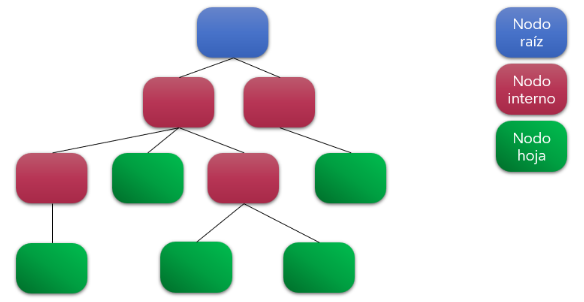

Con la herramienta **graphviz** y **pydotplus** podemos ver como quedaría construído el árbol. En el caso de sistemas Linux deberás instalarla también en su máquina original `sudo apt install graphviz`.

In [126]:
!pip install graphviz # Sólo se ejecuta cuando se instala, luego ya no

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00


In [128]:
!pip install pydotplus # Sólo se ejecuta cuando se instala, luego ya no

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/278.7 kB 330.3 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/278.7 kB 919.0 kB/s eta 0:00:01
     ---------------------- --------------- 163.8/278.7 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=31d20f3a9267b8406d26844b71ef03a31448f9be1b5b1714b7d66eccf9dcc75b
  Stored in directory: c:\users\migue\appdata\local\pip\cache\wheels\77\54\7c\c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
__Nota__: Para poder ver el árbol hay que proceder a la instalación de graphiz. Para Windows se tendría que seguir los pasos del PDF que les doy junto con esta misma clase. Recuerda reniciar Anaconda una vez instaladas las librerías
</div> 

Debe descargarse el ejecutable 'EXE' desde: https://graphviz.org/download/ y además seguir los pasos indicados en el PDF de esta clase y en el video de Youtube: https://www.youtube.com/watch?v=XnxIfoUQeWw

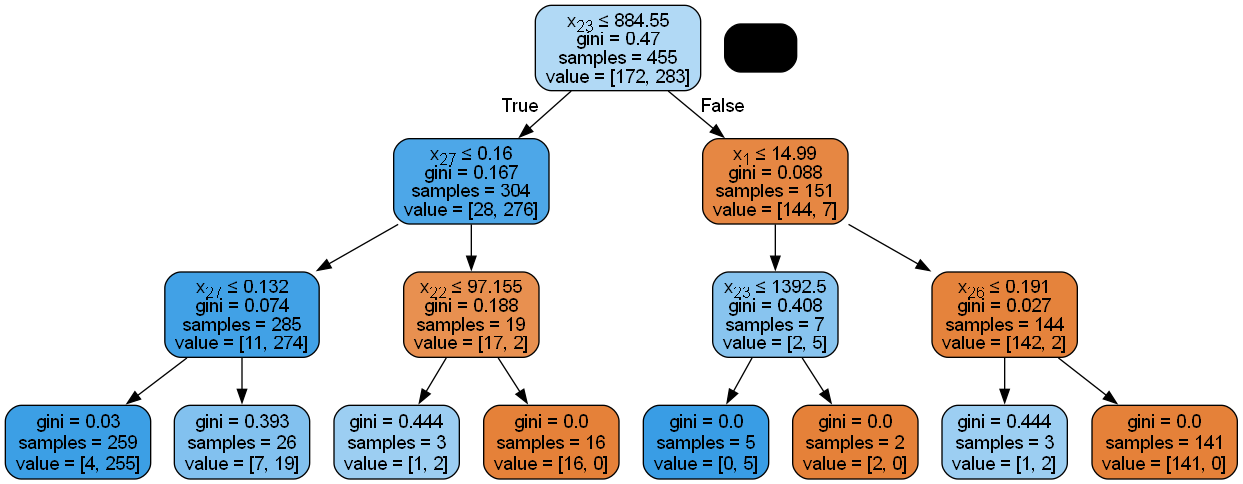

In [51]:
# Para mostrar como ha generado el árbol

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Notamos como la profundidad del árbol es de 3 y como además la división de las ramas se basa en el índice 'gini' buscando que los nodos sean lo más puros posibles. El índice Gini toma un valor entre 0 (cuando todas las instancias pertenecen a una sola clase, es decir, el nodo es puro) y 1 (cuando las clases están perfectamente distribuidas entre las instancias, es decir, el nodo es muy impuro).

El código superior genera y visualiza un árbol de decisión entrenado utilizando la librería *scikit-learn* para la exportación del gráfico del árbol y las bibliotecas *pydotplus* y *IPython.display.Image* para la visualización dentro de un cuaderno Jupyter.

* **from IPython.display import Image:** Esto permite mostrar imágenes directamente dentro del cuaderno Jupyter.
* **from sklearn.tree import export_graphviz:** Se utiliza para convertir el modelo del árbol de decisión en un formato gráfico (DOT format) que puede ser procesado por herramientas como Graphviz para generar imágenes visuales del árbol.
* **import pydotplus:** Permite trabajar con la herramienta dot para generar y renderizar gráficos a partir de la representación DOT del árbol.
* **from six import StringIO:** StringIO permite manejar cadenas de texto como si fueran archivos, en este caso, sirve para almacenar la salida del gráfico en formato DOT.

* **dot_data = StringIO():** Se crea un objeto StringIO llamado dot_data que servirá como almacenamiento temporal para los datos del gráfico en formato DOT.

* **export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True):** Exportación del árbol a formato DOT.
    * **export_graphviz:** Esta función toma el modelo del árbol de decisión (tree) y lo convierte a formato DOT.
    * **tree:** Es el modelo de árbol de decisión entrenado que deseas visualizar.
    * **out_file=dot_data:** La salida del gráfico en formato DOT se almacena en dot_data, que es nuestro archivo temporal en memoria.
    * **filled=True:** Llena los nodos del árbol con colores que indican la pureza de cada nodo (mientras más puro, más oscuro el color).
    * **rounded=True:** Hace que los bordes de los nodos sean redondeados.
    * **special_characters=True:** Permite caracteres especiales en los nombres de las variables.
      
* **graph = pydotplus.graph_from_dot_data(dot_data.getvalue()):**  
    * **pydotplus.graph_from_dot_data():** Crea un objeto gráfico a partir del contenido almacenado en dot_data.
    * **dot_data.getvalue():** Recupera la cadena en formato DOT almacenada en dot_data.

* **Image(graph.create_png()):** Exportación del árbol a formato DOT.
    * **graph.create_png():** Genera un archivo de imagen PNG a partir del gráfico generado.
    * **Image(...):** Muestra la imagen generada directamente en el cuaderno Jupyter.

**Resumen:**
Este código toma un modelo de árbol de decisión, lo convierte a formato DOT usando *export_graphviz*, y luego lo visualiza en formato PNG utilizando *pydotplus* para generar la imagen y *IPython.display.Image* para mostrarla en el cuaderno Jupyter. Es una forma eficaz de visualizar cómo el modelo de árbol de decisión hace las divisiones en los datos.

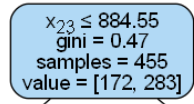

**Resumen del Nodo:**

* Este nodo está evaluando la característica 23 y dividiendo los datos en función de si el valor es menor o igual a 884.55.
* El índice de Gini es 0.47, lo que sugiere que las clases no están completamente separadas en este punto.
* Hay 455 muestras en total, de las cuales 172 pertenecen a una clase y 283 a otra. Ya que este es el nodo raíz, naturalmente las 455 muestras del conjunto de entrenamiento (el 80% del total de las 569 instancias del conjunto de datos separados por train_test_split) pasaron por este nodo.
* Relacionado con *value*, el array muestra cuántas de las muestras han sido clasificadas como malignas (172) o benignas (283).

Este nodo es parte del proceso de toma de decisiones del árbol, y la idea es ir dividiendo los datos de manera que los grupos sean lo más homogéneos posibles en términos de la clase objetivo.

### Otra forma de graficar el Árbol de Decisión:

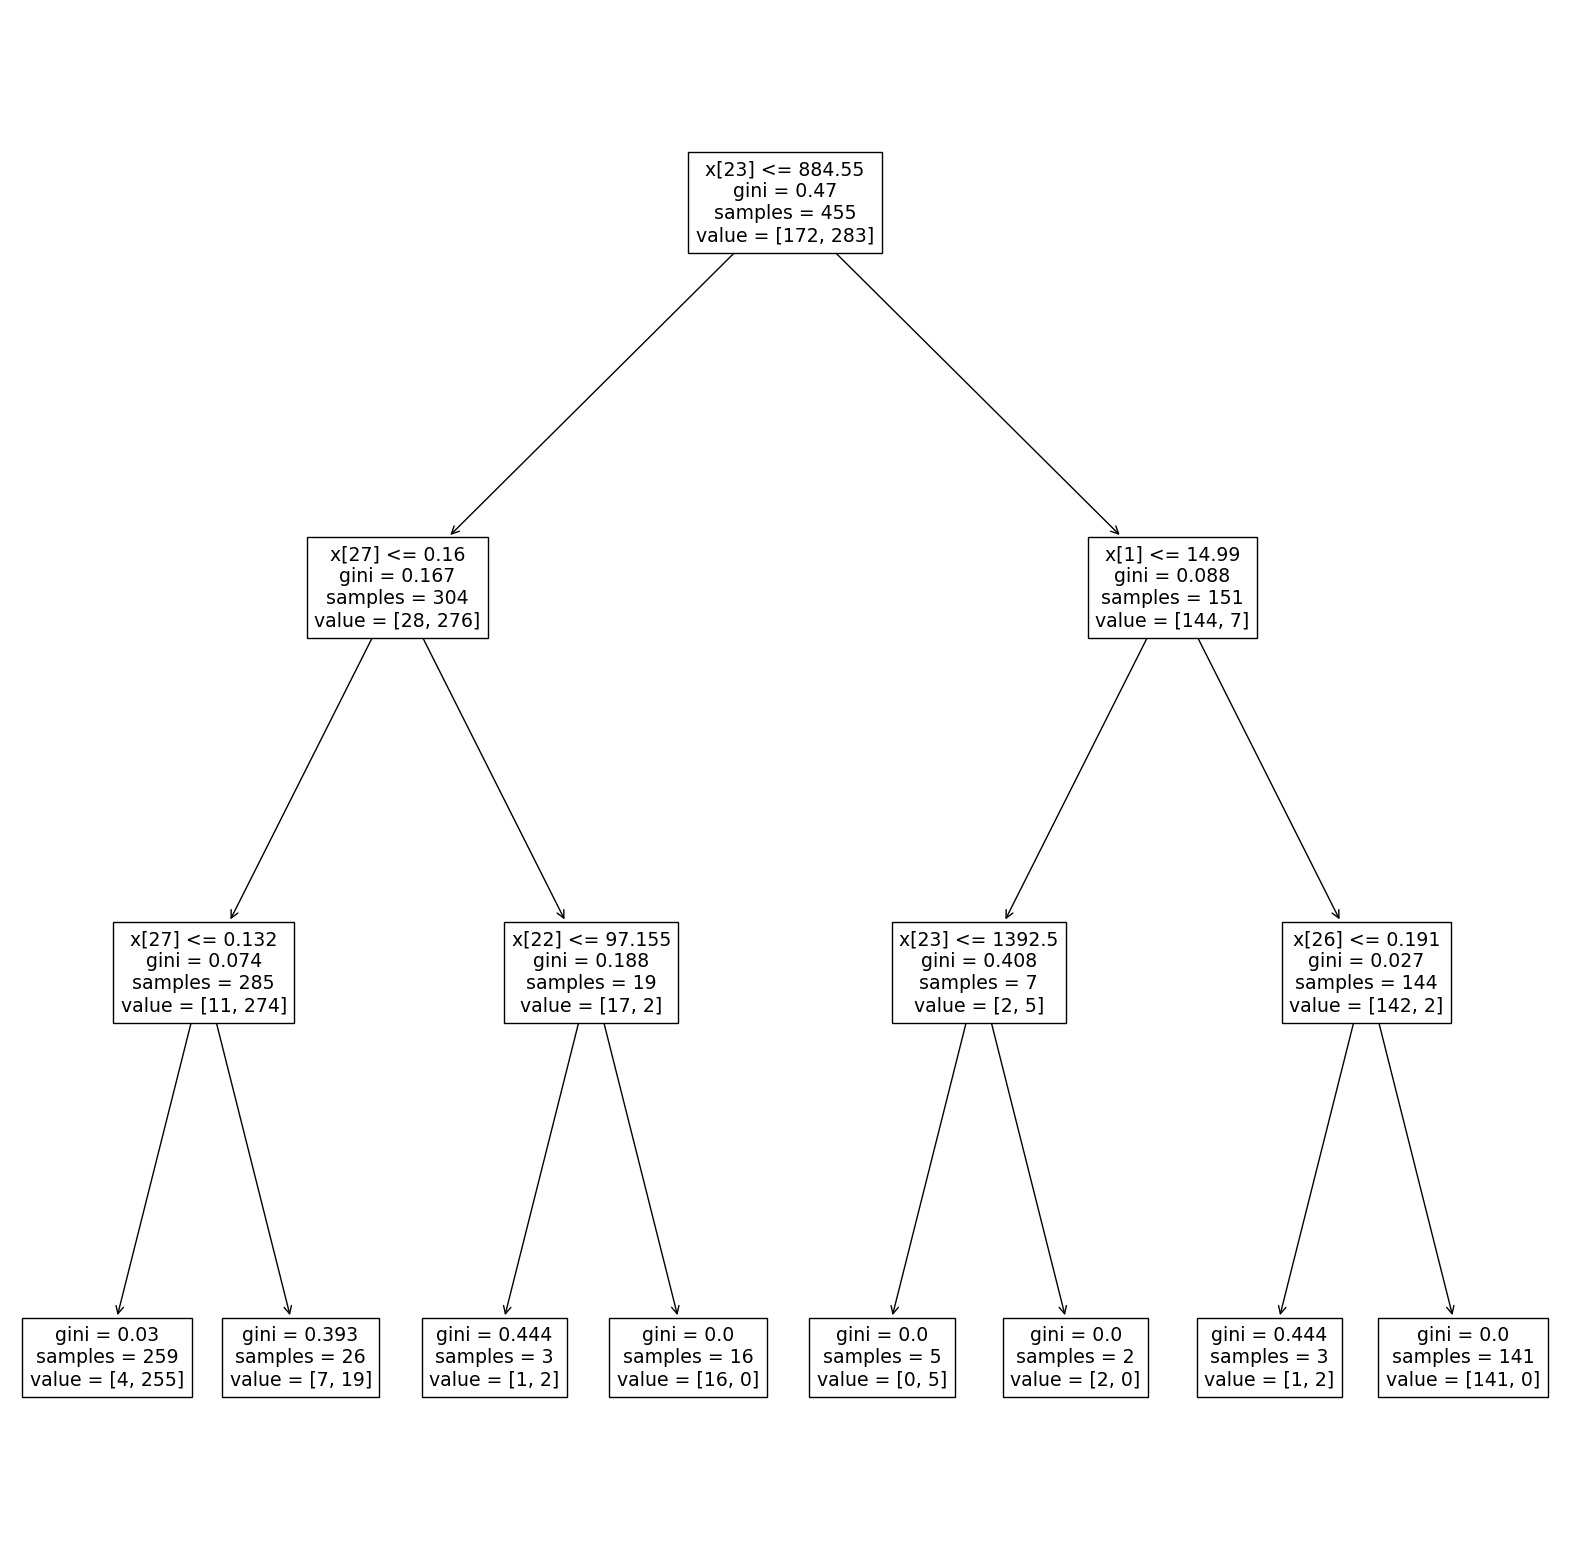

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plot_tree(decision_tree=arbol)
plt.show()

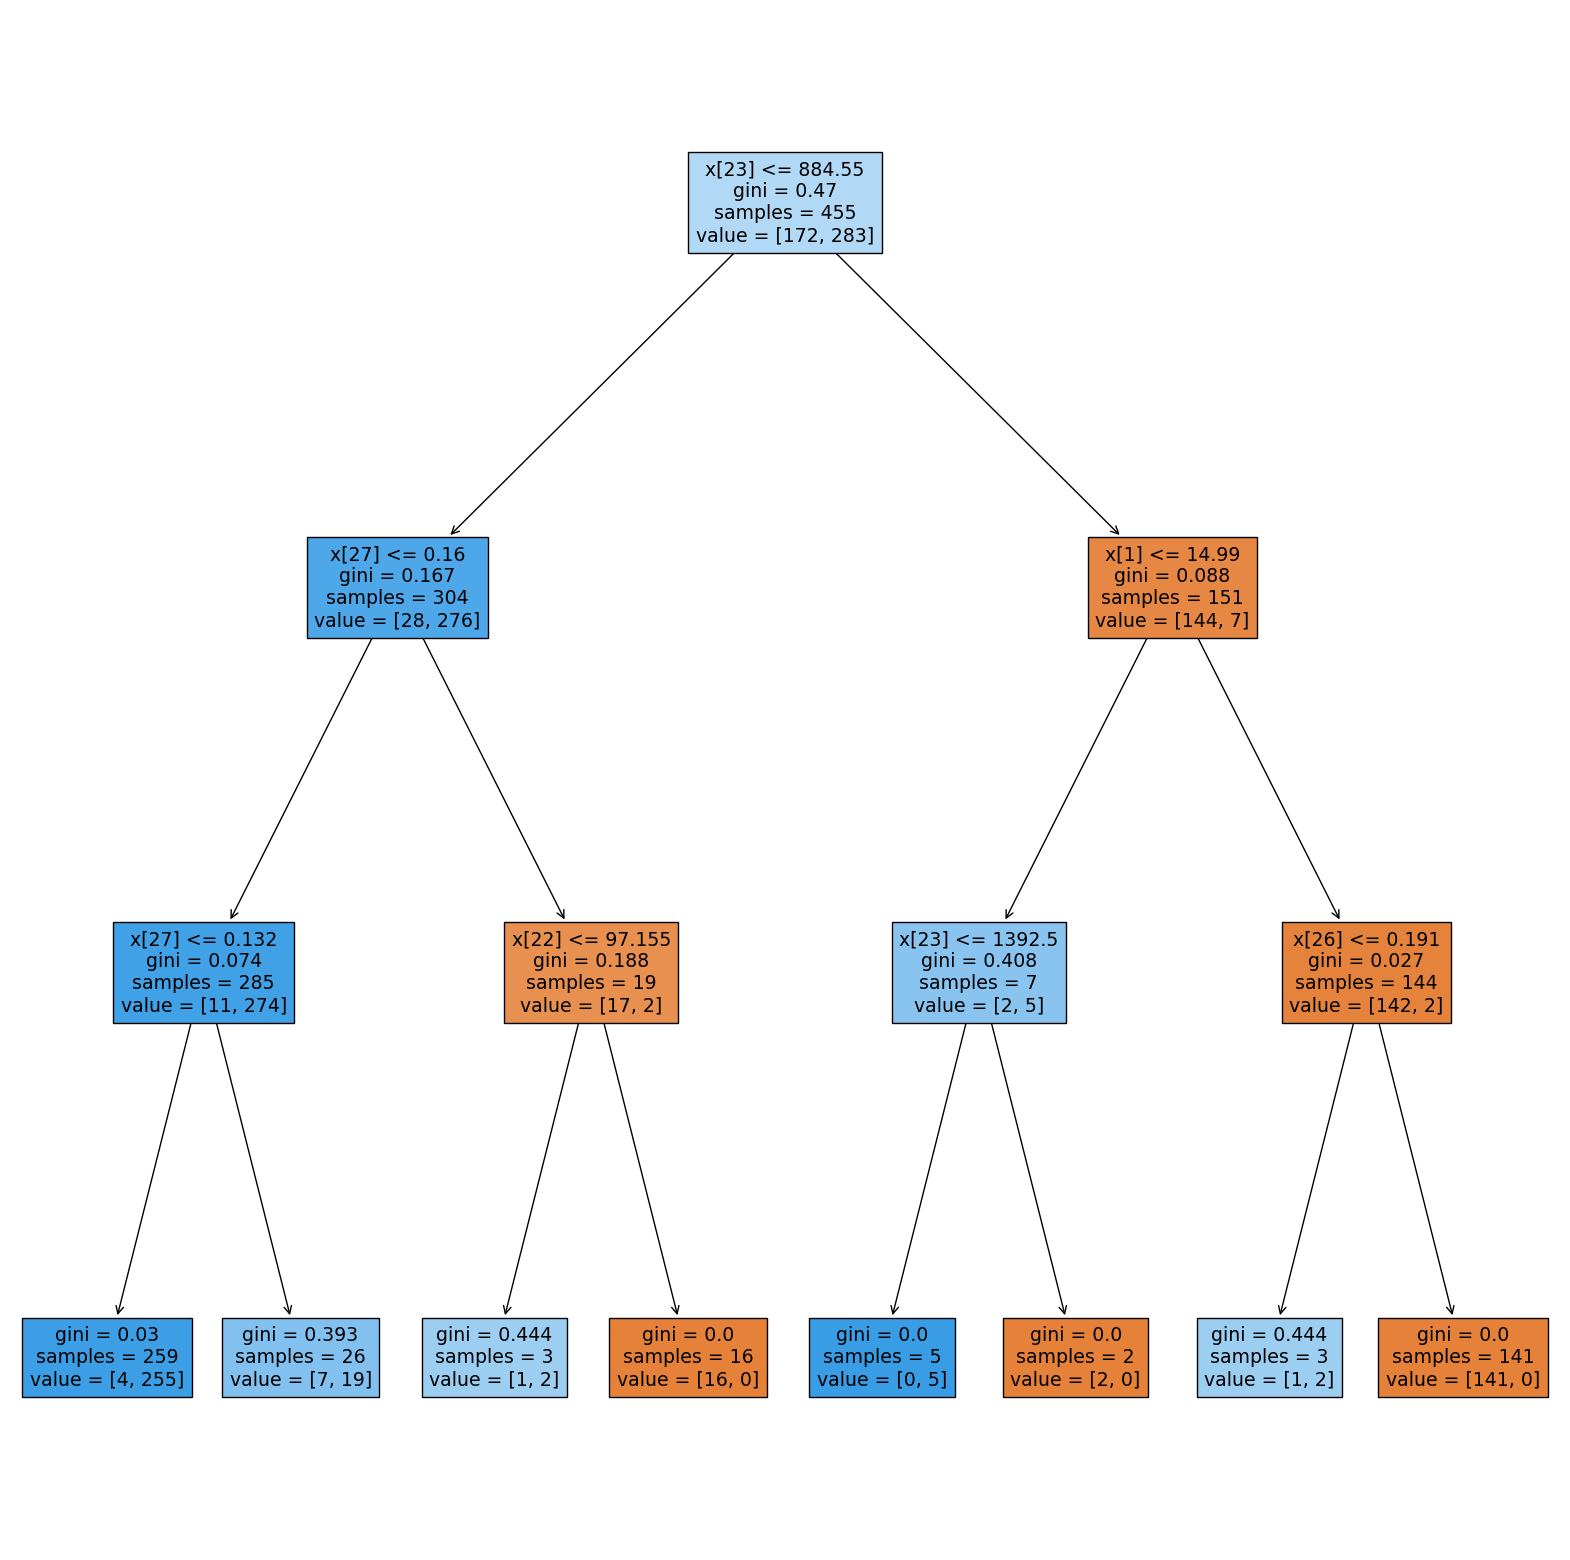

In [61]:
plt.figure(figsize=(20,20))
plot_tree(decision_tree=arbol, filled=True) # le agregamos color (indica la pureza del nodo)
plt.show()

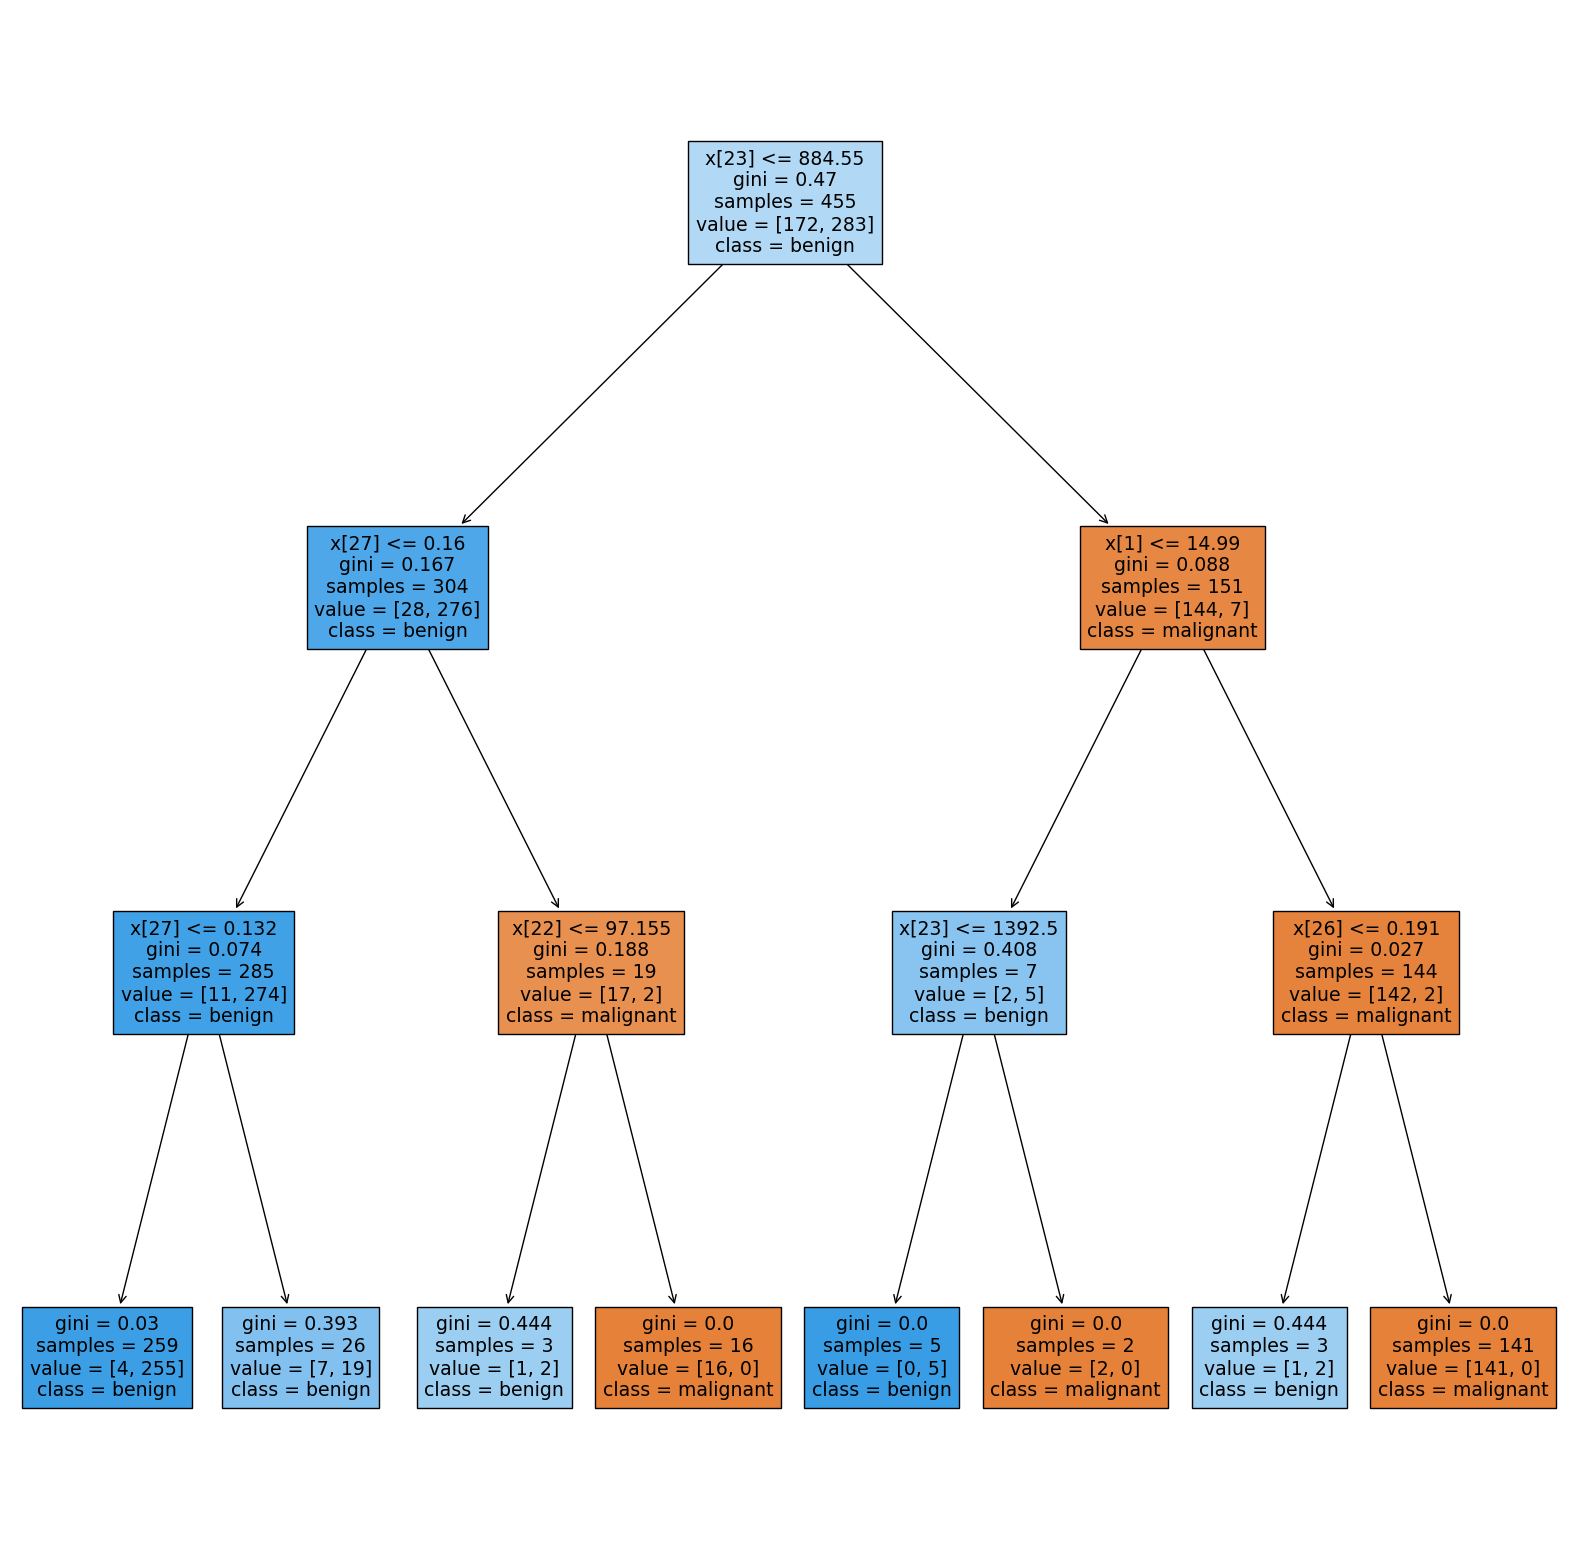

In [63]:
plt.figure(figsize=(20,20))
plot_tree(decision_tree=arbol, filled=True, class_names=wisconsin.target_names) 
plt.show()

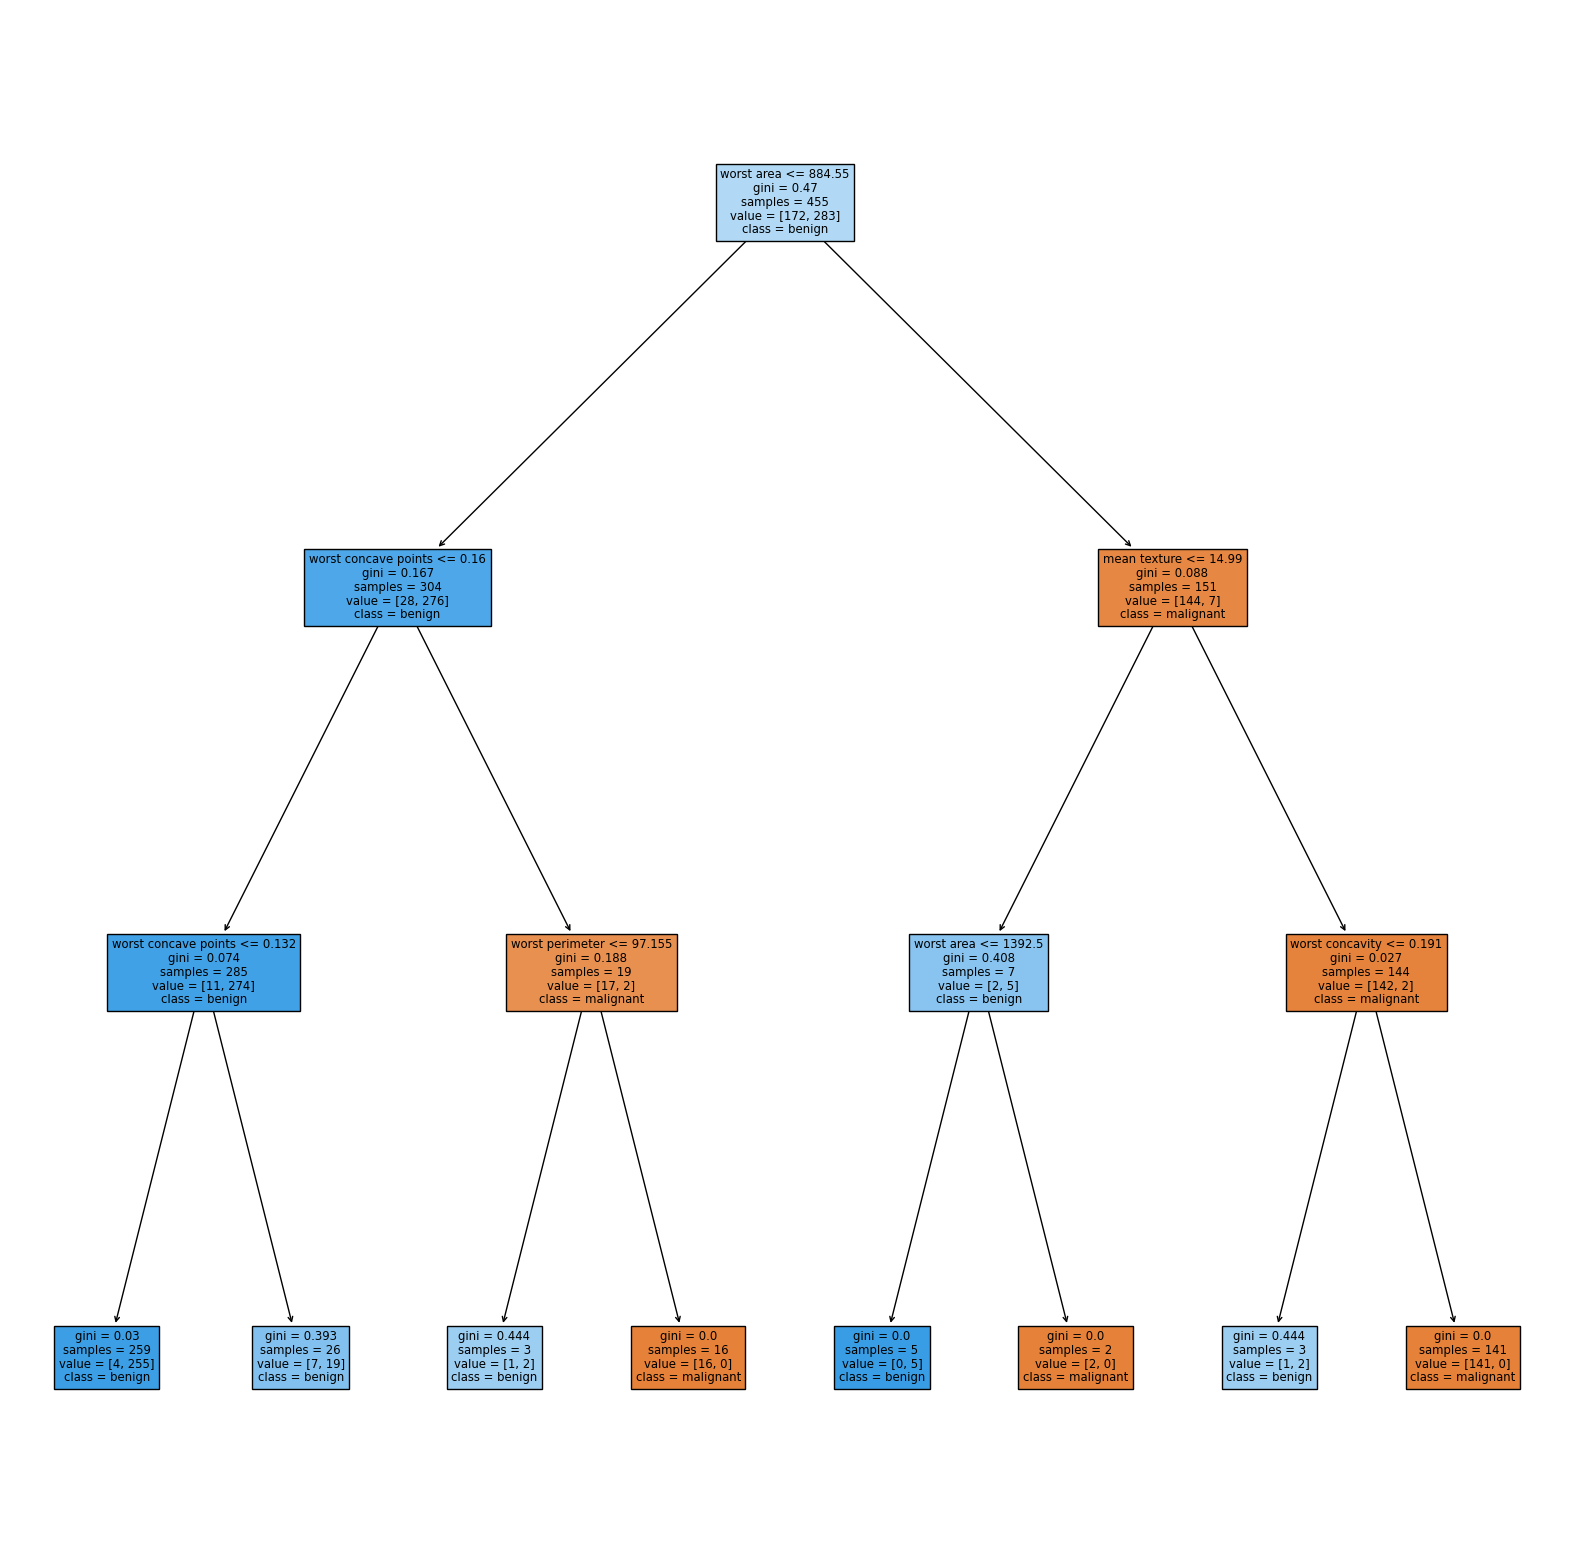

In [65]:
plt.figure(figsize=(20,20))
plot_tree(decision_tree=arbol, filled=True, class_names=wisconsin.target_names, feature_names=wisconsin.feature_names) 
plt.show()

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Extra Trees </font>

Se pueden usar árboles de decisión tipo bagged (ya los veremos en la Fase de Modelado) como Random Forest y Extra Trees para estimar la importancia de las características. En el siguiente ejemplo, construimos un clasificador `ExtraTreesClassifier` para el inicio del conjunto de datos de diabetes de Pima Indians. 

Puede ver que se nos da un puntaje de importancia para cada atributo, donde cuanto mayor es el puntaje, más importante es el atributo. Los puntajes sugieren la importancia de _plas, age_ y _mass_ (prestar atención a que la columna 'class' no recibe puntaje). De todas formas el punto de corte de cuántas características seleccionar lo ponemos nosotros, es decir si nos quedamos con estas 3 o con más también.

In [67]:
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier(random_state = 7)
modelo.fit(X_clas, y_clas)
print(list(df_clas.columns))
print(modelo.feature_importances_) # Importancia que Extra Tree Classifier le da a las características (no incluye al atributo clase)

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[0.10750328 0.22984525 0.09910173 0.0790034  0.07802185 0.14452426
 0.11741104 0.14458919]


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Puede obtener más información sobre la clase [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
</div> 

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Random Forest </font>

En su formulación original, el algoritmo Random Forest computa también la importancia de las variables.

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_wisconsin, y_wisconsin, test_size=0.33, random_state=7)

depth = 3 # Establecemos la profundidad del árbol
bosque = RandomForestClassifier(random_state=7) 

bosque.fit(X_train, y_train)

importancias = bosque.feature_importances_ # Observamos la importancia de las características

y_pred = bosque.predict(X_test)
print(f"Accuracy (con todas las variables): {accuracy_score(y_test, y_pred)*100.0:.2f}%")

Accuracy (con todas las variables): 97.34%


Vemos que en este conjunto de datos tenemos un accuracy muy grande por lo que no tendría sentido hacer una selección de las mejores características. Si fuese menor a, por ejemplo, un 80% deberíamos seleccionar las más importantes:

In [71]:
importancias

array([0.03814543, 0.01928879, 0.05767881, 0.05453384, 0.00645611,
       0.00594748, 0.04790488, 0.08900941, 0.00429106, 0.00447127,
       0.01444523, 0.00373955, 0.01439381, 0.03793314, 0.0036143 ,
       0.0052575 , 0.01339709, 0.00680768, 0.00322268, 0.00745022,
       0.14608411, 0.01928062, 0.1020401 , 0.06382986, 0.01816599,
       0.0125645 , 0.07155431, 0.11558704, 0.00863643, 0.00426877])

In [73]:
# Vamos a usar un método de numpy que nos permite ordenar estas importancias
ranking = np.argsort(bosque.feature_importances_) # Nos devuelve los índices de las características ordenados de menor a mayor
print(wisconsin.feature_names[ranking]) # imprime los nombres de los atributos en función del ranking

['symmetry error' 'smoothness error' 'texture error'
 'worst fractal dimension' 'mean symmetry' 'mean fractal dimension'
 'compactness error' 'mean compactness' 'mean smoothness'
 'concave points error' 'fractal dimension error' 'worst symmetry'
 'worst compactness' 'concavity error' 'perimeter error' 'radius error'
 'worst smoothness' 'worst texture' 'mean texture' 'area error'
 'mean radius' 'mean concavity' 'mean area' 'mean perimeter' 'worst area'
 'worst concavity' 'mean concave points' 'worst perimeter'
 'worst concave points' 'worst radius']


In [75]:
ranking

array([18, 14, 11, 29,  8,  9, 15,  5,  4, 17, 19, 28, 25, 16, 12, 10, 24,
       21,  1, 13,  0,  6,  3,  2, 23, 26,  7, 22, 27, 20], dtype=int64)

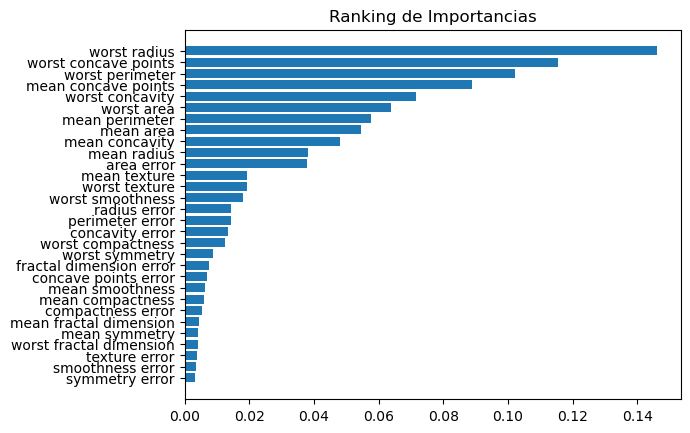

In [79]:
plt.figure()
plt.title("Ranking de Importancias")
plt.barh(range(X_wisconsin.shape[1]), bosque.feature_importances_[ranking])
plt.yticks(range(X_wisconsin.shape[1]), wisconsin.feature_names[ranking])
plt.show()

In [81]:
X_wisconsin.shape[1]

30

In [83]:
bosque.feature_importances_[ranking]

array([0.00322268, 0.0036143 , 0.00373955, 0.00426877, 0.00429106,
       0.00447127, 0.0052575 , 0.00594748, 0.00645611, 0.00680768,
       0.00745022, 0.00863643, 0.0125645 , 0.01339709, 0.01439381,
       0.01444523, 0.01816599, 0.01928062, 0.01928879, 0.03793314,
       0.03814543, 0.04790488, 0.05453384, 0.05767881, 0.06382986,
       0.07155431, 0.08900941, 0.1020401 , 0.11558704, 0.14608411])

Y con estas características podemos ver si, manteniendo aquellas 5 que, según Random Forest tienen más importancia, mejoran nuestros resultados:

In [85]:
ranking

array([18, 14, 11, 29,  8,  9, 15,  5,  4, 17, 19, 28, 25, 16, 12, 10, 24,
       21,  1, 13,  0,  6,  3,  2, 23, 26,  7, 22, 27, 20], dtype=int64)

In [87]:
ranking[-5:]

array([26,  7, 22, 27, 20], dtype=int64)

In [89]:
bosque.fit(X_train[:, ranking[-5:]], y_train) # Entrenamos el bosque con todas las filas de X_train pero sólo las 5 características más importantes

RandomForestClassifier(random_state=7)

In [91]:
y_pred = bosque.predict(X_test[:, ranking[-5:]]) # Predecimos considerando todas las filas de X_test pero sólo las columnas que coincidan con las 5 características más importantes 
print(f"Accuracy (con las 5 características más importantes): {accuracy_score(y_test, y_pred)*100.0:.2f}%")

Accuracy (con las 5 características más importantes): 93.09%


Vemos que no ha bajado mucho, este análisis es importante porque de tener 1000 características, si le saco por ejemplo 600 y baja muy poco el score, por más que tenga más error lo compenso con mucha ganancia en rendimiento computacional.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>